# Example 1 Coin Flip

Here estimation of the probability of a binomial random process after $N$ trials will be estimated using Bayesian inference. This is a simple example that can be evaluated algebraically. This result will be compared with  the result obtained using pyMC. If $\theta$ is the binomial distribution parameter to be estimated and $Y$ the data to be analyzed then Bayes Theorem is defined by,

$
\begin{align}
P[\theta\, |\, Y] = \frac{P[Y\, | \,\theta] P[\theta]}{P[Y]}
\end{align}
\tag{1}
$

where $P[\theta\, |\, Y]$ is the posterior distribution, $P[Y\, | \,\theta]$ is the likelihood of the parameter estimate given the data, $P[\theta]$ is the prior distribution of the data and $P[Y]$ is the marginal likelihood which is given by,

$
\begin{align}
P[Y] = \int P[Y\, | \,\theta] P[\theta] d\theta = \int P[Y, \theta] d\theta
\end{align}
\tag{2}
$

The likelihood function is the Binomial distribution which is the probability $y$ heads after $N$ tosses,

$
\begin{align}
P[Y\, | \,\theta] = \frac{N!}{y!(N-y)!} \theta^y(1 - \theta)^{N-y}
\end{align}
\tag{3}
$

The prior distribution is the Beta distribution with parameters $\alpha$ and $\beta$ which is useful for modeling random variables with a range of $[0, 1]$,

$
\begin{align}
P[\theta] &= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha) + \Gamma(\beta)} \theta^{\alpha-1}(1- \theta)^{\beta-1} \\
          &= \text{Beta}(\alpha, \beta)
\end{align}
\tag{4}
$

It is seen that $P[Y\, | \,\theta]$ and $P[\theta]$ have a similar form. It follows that the posterior distribution is given by,

$
\begin{align}
P[\theta\, |\, Y] &\propto \theta^y(1 - \theta)^{N-y} \theta^{\alpha-1}(1- \theta)^{\beta-1} \\
                  &= \text{Beta}(\alpha_{prior} + y, \beta_{prior} + N - y)
\end{align}
\tag{5}
$

In [42]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot
from scipy import stats
import pymc

sys.path.insert(0, os.path.abspath('../..'))

from lib import config
from lib.plots import (curve, comparison, bar, twinx_bar_line, fcurve_scatter_comparison, positive_negative_bar)

pyplot.style.use(config.glyfish_style)

In [55]:
def simulate_binomial(theta, N, nexp):
    data = numpy.random.binomial(1, theta, N)
    step = N / nexp
    exp_data = []
    for i in range(nexp):
        exp = data[:int((i + 1) * step)]
        heads = numpy.sum(exp)
        trials = len(exp)
        exp_data.append((heads, trials))
    return exp_data

def compute_posterior(beta_params, data):
    x = numpy.linspace(0, 1, 100)
    posteriors = []
    alpha, beta = beta_params
    for heads, trials in data:
        posterior = stats.beta(alpha + heads, beta + trials - heads).pdf(x)
        posteriors.append(posterior)
    return posteriors

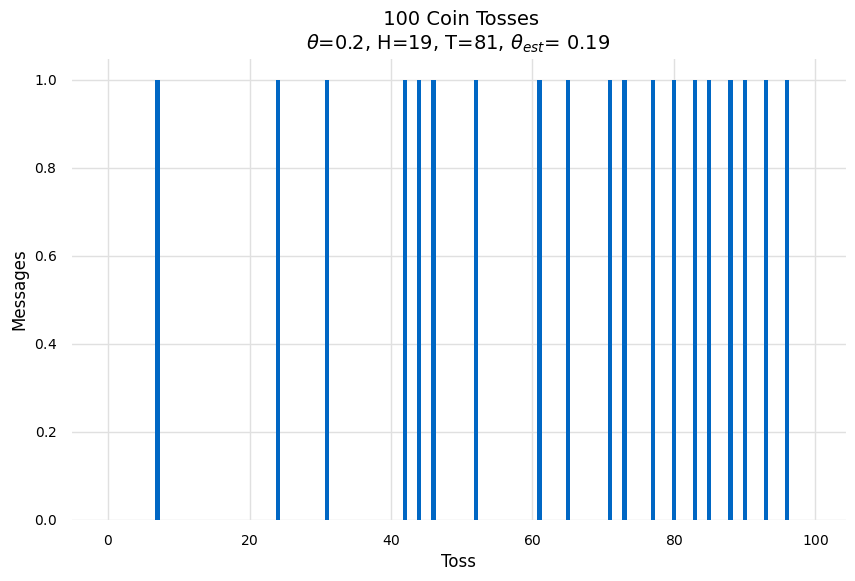

In [44]:
theta = 0.2
ntoss = 100
tau = 50
coin_toss = numpy.random.binomial(1, theta, ntoss)
heads = len(numpy.where(coin_toss == 1)[0])
tails = len(numpy.where(coin_toss == 0)[0])

bar(coin_toss, ylabel='Messages', xlabel='Toss', title=f"{ntoss: ,} Coin Tosses\n$\\theta$={theta}, H={heads}, T={tails}, $\\theta_{{est}}$={heads / ntoss: .2f}", alpha=1.0, bar_width=0.6)

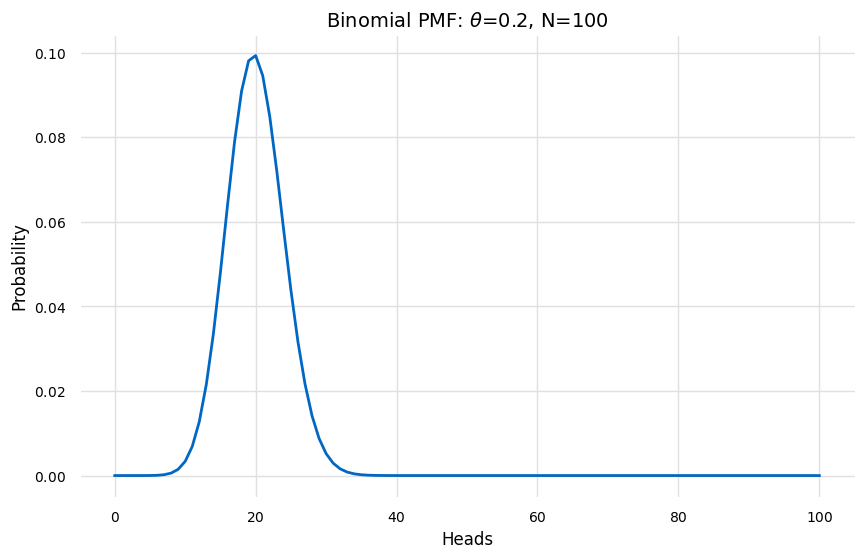

In [45]:
pmf = stats.binom.pmf(numpy.arange(0, ntoss + 1), ntoss, theta)
curve(pmf, ylabel='Probability', xlabel='Heads', title=f"Binomial PMF: $\\theta$={theta}, N={ntoss}")

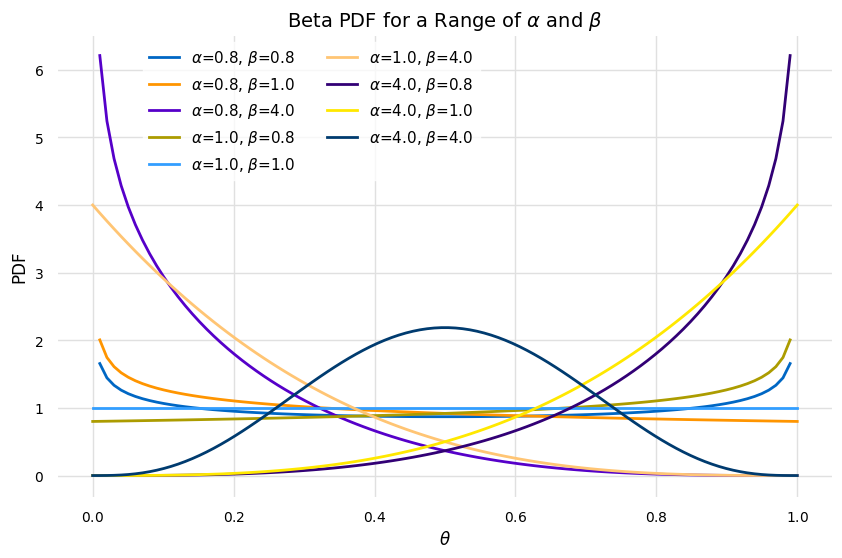

In [46]:

x = numpy.linspace(0, 1, 100)
alpha_vals = [0.8, 0.8, 0.8, 1.0, 1.0, 1.0, 4.0, 4.0, 4.0]
beta_vals = [0.8, 1.0, 4.0, 0.8, 1.0, 4.0, 0.8, 1.0, 4.0]
pdfs = [stats.beta.pdf(x, a, b) for a, b in zip(alpha_vals, beta_vals)]
labels = [f'$\\alpha$={a}, $\\beta$={b}' for a, b in zip(alpha_vals, beta_vals)]
comparison(pdfs, x, ylabel='PDF', xlabel=f"$\\theta$", title=f"Beta PDF for a Range of $\\alpha$ and $\\beta$", labels=labels)

In [57]:
nexp = 4
beta_params = [(0.8, 1.0), (1.0, 4.0), (4.0, 4.0)]

x = numpy.linspace(0, 1, 100)
data = simulate_binomial(theta, ntoss, nexp)
posteriors = compute_posterior(beta_params[0], data)

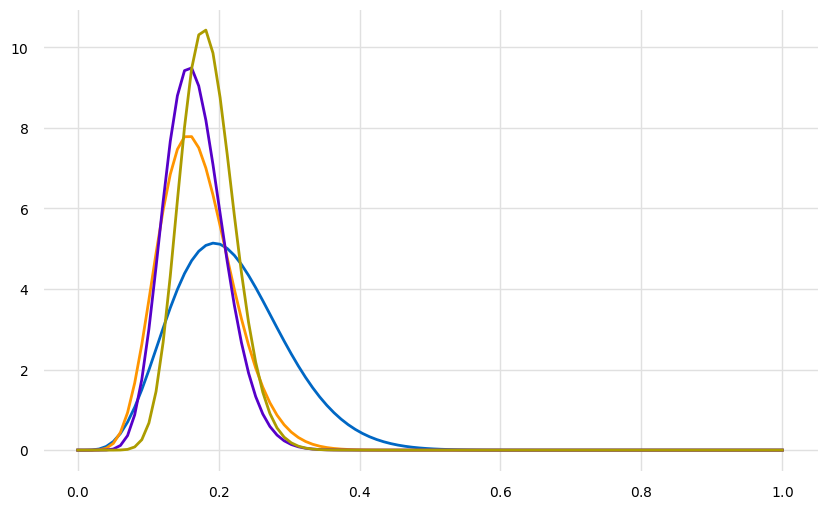

In [ ]:
title = 
comparison(posteriors, x)